In [50]:
import numpy as np
from scipy import constants as const
from scipy import sparse as sparse
from scipy.sparse.linalg import eigs
from matplotlib import pyplot as plt

In [51]:
hbar = const.hbar
e = const.e
m_e = const.m_e
pi = const.pi
epsilon_0 = const.epsilon_0
joul_to_eV = e

## Potential term building function

In [52]:
def calculate_potential_term(r):
    potential = e**2/ (4.0 * pi * epsilon_0) / r
    potential_term = sparse.diags((potential))
    return potential_term

## Angulag term building function

In [53]:
def calculate_angular_term(r,l):
    angular = l * (l + 1) / r**2
    angular_term = sparse.diags((angular))
    return angular_term

## Laplacian building function

In [54]:
def calculate_laplace_three_point(r):
    h = r[1] - r[0]
     
    main_diag = -2.0 / h**2 * np.ones(N)     
    off_diag  =  1.0 / h**2 * np.ones(N - 1)
    laplace_term = sparse.diags([main_diag, off_diag, off_diag], (0, -1, 1))
    return laplace_term

## Hamiltonian building function

In [78]:
def build_hamiltonian(r,l):
    laplace_term =   calculate_laplace_three_point(r)
    angular_term =   calculate_angular_term(r,l)
    potential_term = calculate_potential_term(r)
     
    hamiltonian = -hbar**2 / (2.0 * m_e) * (laplace_term - angular_term) - potential_term
 
    return hamiltonian

## Plot Function

In [56]:
def plot(r, densities, eigenvalues,l):
    plt.xlabel('x ($\\mathrm{\AA}$)')
    plt.ylabel('probability density ($\\mathrm{\AA}^{-1}$)')
     
    energies = ['E = {: >5.2f} eV'.format(eigenvalues[i].real / e) for i in range(3)]
    plt.plot(r * 1e+10, densities[0], color='blue',  label=energies[0]+',n=1,l='+str(l))
    plt.plot(r * 1e+10, densities[1], color='green', label=energies[1]+',n=2,l='+str(l))
    plt.plot(r * 1e+10, densities[2], color='red',   label=energies[2]+',n=3,l='+str(l))
    
     
    plt.legend()
    plt.show()
    return

## set up horizontal axis and hamiltonian

In [72]:
N = 5000
l = 0
r = np.linspace(2e-9, 0.0, N, endpoint=False)
hamiltonian = build_hamiltonian(r,l)

## Solve eigenproblem

In [73]:
number_of_eigenvalues = 30
eigenvalues, eigenvectors = eigs(hamiltonian, k=number_of_eigenvalues, which='SM')

## sort eigenvalue and eigenvectors

In [74]:
eigenvectors = np.array([x for _, x in sorted(zip(eigenvalues, eigenvectors.T), key=lambda pair: pair[0])])
eigenvalues = np.sort(eigenvalues)

## Compute probability density for each eigenvector

In [75]:

densities = [np.absolute(eigenvectors[i, :])**2 for i in range(len(eigenvalues))]

## plot results

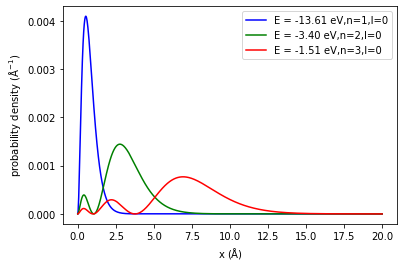

In [76]:
plot(r, densities, eigenvalues,l)

In [82]:
N = 50000
l = 1
r = np.linspace(2e-9, 0.0, N, endpoint=False)
hamiltonian = build_hamiltonian(r,l)
number_of_eigenvalues = 30
eigenvalues, eigenvectors = eigs(hamiltonian, k=number_of_eigenvalues, which='SM')
eigenvectors = np.array([x for _, x in sorted(zip(eigenvalues, eigenvectors.T), key=lambda pair: pair[0])])
eigenvalues = np.sort(eigenvalues)
densities = [np.absolute(eigenvectors[i, :])**2 for i in range(len(eigenvalues))]
plot(r, densities, eigenvalues,l)

KeyboardInterrupt: 

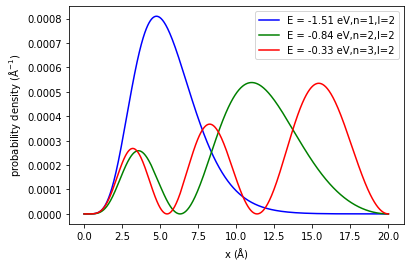

In [79]:
N = 5000
l = 2
r = np.linspace(2e-9, 0.0, N, endpoint=False)
hamiltonian = build_hamiltonian(r,l)
number_of_eigenvalues = 30
eigenvalues, eigenvectors = eigs(hamiltonian, k=number_of_eigenvalues, which='SM')
eigenvectors = np.array([x for _, x in sorted(zip(eigenvalues, eigenvectors.T), key=lambda pair: pair[0])])
eigenvalues = np.sort(eigenvalues)
densities = [np.absolute(eigenvectors[i, :])**2 for i in range(len(eigenvalues))]
plot(r, densities, eigenvalues,l)

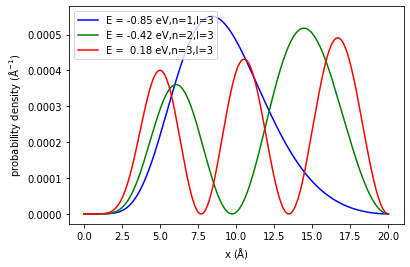

In [81]:
N = 5000
l = 3
r = np.linspace(2e-9, 0.0, N, endpoint=False)
hamiltonian = build_hamiltonian(r,l)
number_of_eigenvalues = 30
eigenvalues, eigenvectors = eigs(hamiltonian, k=number_of_eigenvalues, which='SM')
eigenvectors = np.array([x for _, x in sorted(zip(eigenvalues, eigenvectors.T), key=lambda pair: pair[0])])
eigenvalues = np.sort(eigenvalues)
densities = [np.absolute(eigenvectors[i, :])**2 for i in range(len(eigenvalues))]
plot(r, densities, eigenvalues,l)